In [1]:
import os
from typing import Annotated

from dotenv import load_dotenv
from pathlib import Path

from jedi.inference.gradual.typing import TypedDict

# Construct path two directories up from the **current working directory**
env_path = Path.cwd().resolve().parents[1] / '.env'

# Load .env from that path
load_dotenv(dotenv_path=env_path)

cohere_api_key = os.getenv('COHERE_API_KEY')
if cohere_api_key is None:
    raise ValueError("COHERE_API_KEY not set in .env")

#print(cohere_api_key)  # For debug only

groq_api_key = os.getenv('GROQ_API_KEY')
if groq_api_key is None:
    raise ValueError("GROQ_API_KEY not set in .env")

# Optional: explicitly set in os.environ if required by libraries
os.environ['COHERE_API_KEY'] = cohere_api_key
os.environ['GROQ_API_KEY'] = groq_api_key


In [2]:
import os

# Starting from your current working directory
base_dir = os.getcwd()  # or set explicitly

user_id = 1 # In future I should get this via API

# Build the path
media_path = os.path.join(base_dir, "media", "documents", f"user_{user_id}")

print("Full path:", media_path)

#with open(os.path.join(media_path, "Lab0_Laravel11.pdf")) as f:
#    text = f.read()


Full path: /home/matthew/Desktop/med-assistant-project/rag/notebooks/media/documents/user_1


In [9]:
# Install the splitter module (if needed)
# pip install -qU langchain-text-splitters

from langchain_text_splitters import RecursiveCharacterTextSplitter

#print(media_path)

# For testing in ipynb
from langchain_community.document_loaders import PyPDFLoader
loader = []

loader = PyPDFLoader('/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf')
pages = loader.load()




# Initialize the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1800,         # max characters per chunk
    chunk_overlap=300,       # overlap between chunks
    length_function=len,    # use character count
    separators=["\n\n", "\n", " ", ""],  # split hierarchy
    is_separator_regex=False
)

docs = text_splitter.split_documents(pages)

# Inspect first couple of chunks:
print(docs[7])

page_content='7 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
Laravel Breeze  domyślnie generuje strony za pomocą wi doków Blade, ale m ożna 
skonfigurować go do wykorzystania widoków wykorzystujących Vue, React lub Inertia. 
Najprostsza konfiguracja korzysta z domyślego silnika widoków Blade.  Ten silnik oraz 
Breeze wskazaliśmy przy tworzeniu nowego projektu. 
 
Aby poprawnie działało uwierzytelnienie użytkownika, należy wykorzystać (utworzone już 
w tym celu przez Laravel) elementy związane z zapisem danych użytkownika w bazie danych 
(domyślnie MySQL) . W celu ustawienia połączenia do bazy danych, w pliku .env 
(w głównym folderze projektu) należy podać dane autoryzujące dostęp do bazy danych. Dla 
MySQL domyślne ustawienia w pliku .env (DB_CONNECTION, DB_HOST, itd.) są już 
gotowe (Rys. 12.8). 
 
 
Rys. 12.8. Domyślne ustawienia połączenia do bazy o nazwie lab12 na serwerze MySQL 
Korzystając z narzędzia phpMyAdmin utwórz nową bazę danych o nazwie lab12 (t

In [10]:
print(type(loader))
print(type(pages))

<class 'langchain_community.document_loaders.pdf.PyPDFLoader'>
<class 'list'>


In [4]:
type(docs[1])

langchain_core.documents.base.Document

In [5]:
type(docs[1])

langchain_core.documents.base.Document

In [4]:
import cohere

co = cohere.ClientV2()

text_inputs = [
    {
        "content": [
            {"type": "text", "text": f"{docs[7]}"}
        ]
    },
]

response = co.embed(
    inputs=text_inputs,
    model="embed-v4.0",
    input_type="classification",
    embedding_types=["float"],
)
print(response)


id='d247232e-ed3a-4d43-8ab9-0cb24e28b4b6' embeddings=EmbedByTypeResponseEmbeddings(float_=[[0.008361816, -0.0045776367, -0.018432617, 0.0021972656, 0.00075912476, -0.0061035156, -0.0034942627, 0.016967773, -0.017456055, 0.030273438, -0.039794922, 0.072265625, -0.05883789, 0.0012054443, -0.020874023, 0.004760742, -0.024169922, -0.008178711, 0.015197754, -0.0019302368, 0.05810547, -0.020385742, 0.0015106201, -0.02758789, 0.017456055, 0.0014038086, 0.02709961, 0.009643555, 0.032226562, -0.02734375, -0.007659912, -0.024291992, -0.001083374, 0.0061035156, -0.09033203, -0.010864258, 0.013000488, -0.040283203, -0.028930664, 0.012268066, -0.013061523, -0.008728027, 0.024536133, 0.032470703, -0.045410156, -0.010009766, 0.014160156, -0.016235352, -0.052246094, 0.00051498413, 0.020629883, 0.025756836, -0.006378174, -0.026855469, 0.04345703, 0.024047852, -0.0013046265, 0.003753662, -0.030273438, 0.02746582, -0.0032348633, 0.04711914, 0.04296875, -0.0009727478, -0.044433594, 0.010375977, -0.0303955

In [7]:
from groq import Groq

client = Groq()

chat_completion = client.chat.completions.create(
    messages=[
        # Set an optional system message. This sets the behavior of the
        # assistant and can be used to provide specific instructions for
        # how it should behave throughout the conversation.
        {
            "role": "system",
            "content": "You are a doctor, explain things thoroughly, try to analyze which illness could the patient suffer from. and what's the best solution to resolve it."
        },
        # Set a user message for the assistant to respond to.
        {
            "role": "user",
            "content": "Teach me how to learn quicker",
        }
    ],

    # The language model which will generate the completion.
    model="llama-3.3-70b-versatile"
)

print("Given 3 choices with higher randomness: \n")
num_choices = 3
#for i in range(num_choices):
 #   print(chat_completion.choices[i].message.content)

# Print the completion returned by the LLM.
print(chat_completion.choices[0].message.content)

Given 3 choices with higher randomness: 

Learning is a complex process that involves multiple cognitive, emotional, and environmental factors. To help you learn quicker, I'll provide you with a comprehensive approach that incorporates various strategies, techniques, and tips.

**Understanding How We Learn**

Before we dive into the strategies, let's briefly discuss how our brains process information. The human brain has an incredible ability to reorganize and adapt throughout life, a concept known as neuroplasticity. When we learn, our brains create new connections between neurons, which can be strengthened or weakened based on the frequency and quality of use.

**Effective Learning Strategies**

1. **Setting Clear Goals**: Establishing specific, measurable, achievable, relevant, and time-bound (SMART) goals helps you focus on what you want to learn. Break down larger goals into smaller, manageable chunks, and prioritize them based on importance and urgency.
2. **Active Recall**: This

In [9]:
"""
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS

urls = [
    "https://www.matthewlozinski.com/",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=512, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)

vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=co,
)

vectorstore_retriever = vectorstore.as_retriever()
"""

'\nfrom langchain.text_splitter import RecursiveCharacterTextSplitter\nfrom langchain_community.document_loaders import WebBaseLoader\nfrom langchain_community.vectorstores import FAISS\n\nurls = [\n    "https://www.matthewlozinski.com/",\n]\n\ndocs = [WebBaseLoader(url).load() for url in urls]\ndocs_list = [item for sublist in docs for item in sublist]\n\ntext_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(\n    chunk_size=512, chunk_overlap=0\n)\ndoc_splits = text_splitter.split_documents(docs_list)\n\nvectorstore = FAISS.from_documents(\n    documents=doc_splits,\n    embedding=co,\n)\n\nvectorstore_retriever = vectorstore.as_retriever()\n'

In [10]:
import os

# Path to shared documents inside the container
documents_path = "/app/shared_documents/user_1"

# List files
files = os.listdir(documents_path)

# Print the list of files
print(files)

FileNotFoundError: [Errno 2] No such file or directory: '/app/shared_documents/user_1'

In [11]:
class State(TypedDict):
    pass
    #messages: Annotated[list, add_messages]

In [5]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from langchain_cohere import CohereEmbeddings


embeddings = CohereEmbeddings(model="embed-v4.0")
index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world")))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(), # It is in RAM, thus in future I will need to store it in Postgres container's volume
    index_to_docstore_id={},
)

# Add documents to the vector store
documents = [doc for doc in docs if doc is not None]
ids = [f"{i}" for i in range(1, len(docs) + 1, 1)]
vector_store.add_documents(documents=documents, ids=ids)

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33']

In [17]:
type(vector_store)

langchain_community.vectorstores.faiss.FAISS

In [8]:
type(vector_store)

langchain_community.vectorstores.faiss.FAISS

In [12]:
# for dev testing on embeddings accuracy
results = vector_store.similarity_search_with_score(query="phpmyadmin wraz z mongo czy top mozliwe",k=3)
for doc, score in results:
    print(f"* [SIM={score:3f}] {doc.page_content} [{doc.metadata}]")

* [SIM=1.412498] 13 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
 
Rys. 12.18. Wykonanie migracji 
 
Sprawdź w PhpMyAdmin efekt wykonania polecenia  z Rys. 12.1 8. Następnie utwórz klasę 
modelu Comment (zwróć uwagę na liczbę pojedynczą w  nazwie modelu ), który będzie 
abstrakcyjną reprezentacją bytu bazodanowego dla tabeli komentarzy z  poziomu aplikacji  
(Rys. 12.19): 
php artisan make:model Comment 
 
 
Rys. 12.19. Polecenie tworzenia modelu 
 
W wyniku wykonania polecenia  z Rys. 12. 19, w katalogu app/Models utworzył się plik 
Comment.php z definicją klasy Comment. Dodaj do niego fragment ( Rys. 12.20) definiujący 
relację jeden do jednego (jeden komentarz ma jednego autora).  
Dodaj także import klasy User. [{'producer': 'Microsoft® Word 2010', 'creator': 'Microsoft® Word 2010', 'creationdate': '2024-11-29T21:25:14+01:00', 'author': 'Marcel', 'moddate': '2024-11-29T21:25:14+01:00', 'source': '/home/matthew/Desktop/med-assistant-project/backend/media/do

In [11]:
for doc, score in results:
    print(type(doc.metadata))
    print(type(doc.page_content))

<class 'dict'>
<class 'str'>


In [13]:
# Reranking the documents based on best document's embeddings
co_rerank = cohere.ClientV2()

docs = [doc.page_content + " " + str(doc.metadata) for doc, score in results]

response = co_rerank.rerank(
    model="rerank-v3.5",
    query="What is the capital of the United States?",
    documents=docs,
    top_n=3,
)
print(response)


id='25aa065e-62cb-496e-96af-302d2b0b8fec' results=[V2RerankResponseResultsItem(document=None, index=1, relevance_score=0.044039294), V2RerankResponseResultsItem(document=None, index=0, relevance_score=0.03733048), V2RerankResponseResultsItem(document=None, index=2, relevance_score=0.036291793)] meta=ApiMeta(api_version=ApiMetaApiVersion(version='2', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(images=None, input_tokens=None, output_tokens=None, search_units=1.0, classifications=None), tokens=None, warnings=None)


In [18]:
user_message = "Jak mam używać PhpMyadmina z mongodb, czy to wgl mozliwe?"
results = vector_store.similarity_search(query=f"{user_message}",k=1)

In [19]:
print(results)

[Document(id='14', metadata={'producer': 'Microsoft® Word 2010', 'creator': 'Microsoft® Word 2010', 'creationdate': '2024-11-29T21:25:14+01:00', 'author': 'Marcel', 'moddate': '2024-11-29T21:25:14+01:00', 'source': '/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf', 'total_pages': 30, 'page': 12, 'page_label': '13'}, page_content='13 \nZintegrowany Program Rozwoju Politechniki Lubelskiej – część druga \n \n \nRys. 12.18. Wykonanie migracji \n \nSprawdź w PhpMyAdmin efekt wykonania polecenia  z Rys. 12.1 8. Następnie utwórz klasę \nmodelu Comment (zwróć uwagę na liczbę pojedynczą w  nazwie modelu ), który będzie \nabstrakcyjną reprezentacją bytu bazodanowego dla tabeli komentarzy z  poziomu aplikacji  \n(Rys. 12.19): \nphp artisan make:model Comment \n \n \nRys. 12.19. Polecenie tworzenia modelu \n \nW wyniku wykonania polecenia  z Rys. 12. 19, w katalogu app/Models utworzył się plik \nComment.php z definicją klasy Comment. Dodaj do niego fra

In [14]:
retriever = vector_store.as_retriever(
    search_type="similarity", # Maybe with threshold, but I would have to monitor and investigate it in the production.
    search_kwargs={"k": 3},
)
retriever.invoke("Jak mam używać PhpMyadmina z mongodb, czy to wgl mozliwe?")

[Document(id='14', metadata={'producer': 'Microsoft® Word 2010', 'creator': 'Microsoft® Word 2010', 'creationdate': '2024-11-29T21:25:14+01:00', 'author': 'Marcel', 'moddate': '2024-11-29T21:25:14+01:00', 'source': '/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf', 'total_pages': 30, 'page': 12, 'page_label': '13'}, page_content='13 \nZintegrowany Program Rozwoju Politechniki Lubelskiej – część druga \n \n \nRys. 12.18. Wykonanie migracji \n \nSprawdź w PhpMyAdmin efekt wykonania polecenia  z Rys. 12.1 8. Następnie utwórz klasę \nmodelu Comment (zwróć uwagę na liczbę pojedynczą w  nazwie modelu ), który będzie \nabstrakcyjną reprezentacją bytu bazodanowego dla tabeli komentarzy z  poziomu aplikacji  \n(Rys. 12.19): \nphp artisan make:model Comment \n \n \nRys. 12.19. Polecenie tworzenia modelu \n \nW wyniku wykonania polecenia  z Rys. 12. 19, w katalogu app/Models utworzył się plik \nComment.php z definicją klasy Comment. Dodaj do niego fra

In [ ]:
from typing import Annotated, List

from langchain_community.document_loaders import WebBaseLoader
from langchain_core.tools import tool


medical_sites = [
    {"name": "Mayo Clinic", "url": "https://www.mayoclinic.org"},
    {"name": "WebMD", "url": "https://www.webmd.com"},
    {"name": "MedlinePlus", "url": "https://medlineplus.gov"},
    {"name": "Healthline", "url": "https://www.healthline.com"},
    {"name": "BMJ (British Medical Journal)", "url": "https://www.bmj.com"},
]


@tool
def scrape_webpages(urls: List[str]) -> str:
    """Use requests and bs4 to scrape the provided web pages for detailed information."""
    loader = WebBaseLoader([site["url"] for site in medical_sites])
    docs = loader.load()
    return "\n\n".join(
        [
            f'<Document name="{doc.metadata.get("title", "")}">\n{doc.page_content}\n</Document>'
            for doc in docs
        ]
    )

In [16]:
from langchain_groq import ChatGroq

llm_rewriter = ChatGroq(temperature=0.01, model="llama-3.1-8b-instant")
llm_answerer = ChatGroq(temperature=0.5, model="deepseek-r1-distill-llama-70b")

human_message = "So, I was wondering, like, what’s the actual difference between PostgreSQL and phpMyAdmin? Because I know both are kind of related to databases, right? But I’m not really sure if one of them is the database itself and the other is just a tool or something to look at the data, or maybe they both do the same thing in different ways? Also, can you use phpMyAdmin with PostgreSQL, or is it only for something like MySQL? I feel a bit confused because people talk about them like they’re both important, but I don’t know how they work together or if they even do."

messages = [
    (
        "system",
        "You are a helpful assistant that rewrites verbose user questions into short, keyword-rich queries suitable for vector similarity search. Do not answer the question. Only return the rewritten query.\n\nExample:\nInput: 'Can you explain what the difference is between SQL and NoSQL databases and when to use them?'\nOutput: 'difference SQL vs NoSQL databases usage scenario'\n",
    ),
    ("human", f"{human_message}"),
]

ai_msg = llm_rewriter.invoke(messages)
ai_msg

AIMessage(content='PostgreSQL vs phpMyAdmin difference database tool relationship', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 232, 'total_tokens': 243, 'completion_time': 0.03058522, 'prompt_time': 0.013696378, 'queue_time': 0.038573243, 'total_time': 0.044281598}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_348199b5a7', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--49eac85d-5fe6-4236-b88c-d3e9c0ffbc63-0', usage_metadata={'input_tokens': 232, 'output_tokens': 11, 'total_tokens': 243})

In [ ]:
from langgraph.graph import StateGraph, START, END
rag = StateGraph(State)
rag.add_node("rewriter", rewriter)
rag.add_node("answerer", answerer)
rag.add_node("router", router)
rag.add_node("scrape_webpages", scrape_webpages)
rag.add_edge(scrape_webpages, END)

rag.add_edge(START, "supervisor")
rag = rag.compile()

In [2]:
import os
from typing import Annotated

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

from jedi.inference.gradual.typing import TypedDict

# Construct path two directories up from the **current working directory**
env_path = Path.cwd().resolve().parents[1] / '.env'

# Load .env from that path
# load_dotenv(dotenv_path=env_path)
load_dotenv(find_dotenv(), override=True)


cohere_api_key = os.getenv('COHERE_API_KEY')
if cohere_api_key is None:
    raise ValueError("COHERE_API_KEY not set in .env")

#print(cohere_api_key)  # For debug only

groq_api_key = os.getenv('GROQ_API_KEY')
if groq_api_key is None:
    raise ValueError("GROQ_API_KEY not set in .env")

langsmith_api_key = os.getenv('LANGSMITH_API_KEY')
if langsmith_api_key is None:
    raise ValueError("LANGSMITH_API_KEY not set in .env")

# Optional: explicitly set in os.environ if required by libraries
os.environ['COHERE_API_KEY'] = cohere_api_key
os.environ['GROQ_API_KEY'] = groq_api_key
os.environ['LANGSMITH_API_KEY'] = langsmith_api_key


In [7]:
import langchain_community
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, List, Literal
from typing_extensions import TypedDict
import operator
from langchain_groq import ChatGroq
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from langchain_cohere import CohereEmbeddings
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
import cohere
from langchain_core.documents.base import Document

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "RAG-Medical-Project"

llm_rewriter = ChatGroq(temperature=0.01, model="llama-3.1-8b-instant")
llm_answerer = ChatGroq(temperature=0.5, model="deepseek-r1-distill-llama-70b")

# Define the state with message history
class State(TypedDict):
    messages: Annotated[List, add_messages]
    rewritten_query: str
    retrieved_docs: List[str]
    reflection_count: int
    router_decision: str
    user_prompt: str
    scraped_count: int
    input_docs: List[Document]

def rewriter(state: State) -> State:
    """Rewrite user message to be keyword-friendly for vector search"""
    # Get the last user message - fixed to access content attribute
    human_message = state["messages"][-1].content

    messages = [
        SystemMessage(content="You are a helpful assistant that rewrites verbose user questions into short, keyword-rich queries suitable for vector similarity search. Do not answer the question. Only return the rewritten query.\n\nExample:\nInput: 'Can you explain what the difference is between SQL and NoSQL databases and when to use them?'\nOutput: 'difference SQL vs NoSQL databases usage scenario'\n"),
        HumanMessage(content=human_message),
    ]

    # Your LLM call to rewrite the query
    rewritten = llm_rewriter.invoke(messages)

    return {
        "messages": [SystemMessage(content=f"Query rewritten to: {rewritten.content}")],
        "rewritten_query": rewritten.content,
        "user_prompt": human_message
    }

def retriever(state: State) -> State:
    """Retrieve documents based on rewritten query"""
    query = state["rewritten_query"]
    embeddings = CohereEmbeddings(model="embed-v4.0")
    index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world")))

    vector_store = FAISS(
        embedding_function=embeddings,
        index=index,
        docstore=InMemoryDocstore(), # It is in RAM, thus in future I will need to store it in Postgres container's volume
        index_to_docstore_id={},
    )
    docs = state["input_docs"]
    # Add documents to the vector store - only if docs exist
    if docs:
        documents = [doc for doc in docs if doc is not None]
        ids = [f"{i}" for i in range(1, len(documents) + 1, 1)]
        vector_store.add_documents(documents=documents, ids=ids)
        results = vector_store.similarity_search_with_score(query=query, k=3)

        co_rerank = cohere.ClientV2()

        docs_content = [doc.page_content + " " + str(doc.metadata) for doc, score in results]

        response = co_rerank.rerank(
            model="rerank-v3.5",
            query=query,
            documents=docs_content,
            top_n=3,
        )

        reranked_docs = [docs_content[result.index] for result in response.results]
    else:
        reranked_docs = []

    return {
        "messages": [SystemMessage(content=f"Retrieved {len(reranked_docs)} documents")],
        "retrieved_docs": reranked_docs
    }

def router(state: State) -> State:
    """Decide whether to scrape web, self-reflect, or respond to user"""

    reflection_count = state.get("reflection_count", 0)
    retrieved_docs = state.get("retrieved_docs", [])
    scraped_count = state.get("scraped_count", 0)

    prompt = f"""
    Based on the retrieved documents: {retrieved_docs}
    , reflection count: {reflection_count}
    , and scraped count: {scraped_count}

    Should I:
    1. "scrape_webpages" - if retrieved docs are insufficient (max 3 times), but you must DO THIS at least once!
    2. "self_reflect" - if I need to analyze more (max 3 times)
    3. "answerer" - if I'm ready to respond

    Remember you MUST return only one word: scrape_webpages, self_reflect, or answerer
    """
    llm_decision = llm_answerer.invoke([HumanMessage(content=prompt)]).content.strip()

    return {
        "messages": [SystemMessage(content=f"Router decision: {llm_decision}")],
        "router_decision": llm_decision
    }


from langchain_community.document_loaders import WebBaseLoader

medical_sites = [
    {
        "name": "Matthew Clinic",
        "url": "https://www.matthewlozinski.com/",
        "description": "Trusted medical researcher from a world-renowned clinical and research institution. Offers detailed content on diseases, conditions, tests, and procedures."
    },
    {
        "name": "Mayo Clinic",
        "url": "https://www.mayoclinic.org",
        "description": "Trusted medical information from a world-renowned clinical and research institution. Offers detailed content on diseases, conditions, tests, and procedures."
    },
    {
        "name": "WebMD",
        "url": "https://www.webmd.com",
        "description": "Popular consumer health site featuring a symptom checker, drug info, and doctor-reviewed health articles written in layman's terms."
    },
    {
        "name": "MedlinePlus",
        "url": "https://medlineplus.gov",
        "description": "A service of the U.S. National Library of Medicine providing free, reliable health information in multiple languages with no ads or commercial bias."
    },
    {
        "name": "Healthline",
        "url": "https://www.healthline.com",
        "description": "Health and wellness site with medical articles reviewed by experts, covering fitness, nutrition, mental health, and medical conditions."
    },
    {
        "name": "BMJ (British Medical Journal)",
        "url": "https://www.bmj.com",
        "description": "Leading peer-reviewed journal providing clinical research, reviews, medical news, and opinion pieces for healthcare professionals."
    }
]

def scrape_webpages(state: State) -> State:
    """Scrape web pages for additional information"""
    # Soon I should add a model to check which sites to visit.

    try:
        loader = WebBaseLoader([site["url"] for site in medical_sites])
        docs_scraped = loader.load()

        if docs_scraped:
            scraped_content = f"Scraped content from the chosen websites, with their titles related to {state['rewritten_query']}, is as follows: '<Document name={docs_scraped[0].metadata.get('title', '')}>\n{docs_scraped[0].page_content}\n</Document>'"
        else:
            scraped_content = "No content was scraped from the websites."
    except Exception as e:
        scraped_content = f"Error scraping websites: {str(e)}"

    # Add scraped content to retrieved docs
    updated_docs = state["retrieved_docs"] + [scraped_content]

    return {
        "messages": [SystemMessage(content="Web scraping completed, retrieved docs")],
        "retrieved_docs": updated_docs
    }

def self_reflect(state: State) -> State:
    reflection_count = state.get("reflection_count", 0) + 1

    reflection = llm_answerer.invoke([HumanMessage(content=f"Analyze this, and reflect on the following:, the prompt from a user: {state['user_prompt']}, and on the documents that were previously retrieved: {state['retrieved_docs']}")])

    return {
        "messages": [AIMessage(content=reflection.content)],
        "reflection_count": reflection_count
    }

def answerer(state: State) -> State:
    """Generate final response to user"""
    answer = llm_answerer.invoke([HumanMessage(content=f"Answer based on retrieved documents: {state['retrieved_docs']}, and on the initial user prompt {state['user_prompt']}")]) # Also on it's last reflection

    return {
        "messages": [AIMessage(content=answer.content)]
    }

def route_decision(state: State) -> Literal["scrape_webpages", "self_reflect", "answerer"]:
    """Route based on the router's decision"""
    decision = state.get("router_decision", "answerer")

    if decision == "scrape_webpages":
        return "scrape_webpages"
    elif decision == "self_reflect":
        return "self_reflect"
    else:
        return "answerer"

# Create the graph
def create_rag_graph():
    rag = StateGraph(State)

    # Add nodes
    rag.add_node("rewriter", rewriter)
    rag.add_node("retriever", retriever)
    rag.add_node("router", router)
    rag.add_node("scrape_webpages", scrape_webpages)
    rag.add_node("self_reflect", self_reflect)
    rag.add_node("answerer", answerer)

    # Add edges
    rag.add_edge(START, "rewriter")
    rag.add_edge("rewriter", "retriever")
    rag.add_edge("retriever", "router")

    # Conditional edges from router
    rag.add_conditional_edges(
        "router",
        route_decision,
        {
            "scrape_webpages": "scrape_webpages",
            "self_reflect": "self_reflect",
            "answerer": "answerer"
        }
    )

    # After scraping, go back to router
    rag.add_edge("scrape_webpages", "router")

    # After self-reflection, go back to router
    rag.add_edge("self_reflect", "router")

    # End after answering
    rag.add_edge("answerer", END)

    return rag.compile()

"""
# Create the compiled graph
rag_graph = create_rag_graph()

# Example usage
initial_state = {
    "messages": [HumanMessage(content="What is machine learning?")],
    "rewritten_query": "",
    "retrieved_docs": [],
    "reflection_count": 0,
    "router_decision": "",
    "input_docs": docs
}

# Run the graph
final_state = rag_graph.invoke(initial_state)
print("Final messages:", final_state["messages"])
"""

'\n# Create the compiled graph\nrag_graph = create_rag_graph()\n\n# Example usage\ninitial_state = {\n    "messages": [HumanMessage(content="What is machine learning?")],\n    "rewritten_query": "",\n    "retrieved_docs": [],\n    "reflection_count": 0,\n    "router_decision": "",\n    "input_docs": docs\n}\n\n# Run the graph\nfinal_state = rag_graph.invoke(initial_state)\nprint("Final messages:", final_state["messages"])\n'

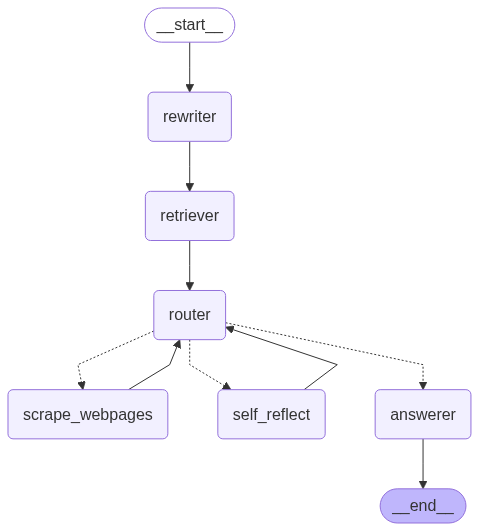

In [6]:
from IPython.display import Image, display

# Assuming 'compiled_graph' is your compiled workflow
display(Image(rag_graph.get_graph().draw_mermaid_png()))

In [8]:
# Install the splitter module (if needed)
# pip install -qU langchain-text-splitters

from langchain_text_splitters import RecursiveCharacterTextSplitter

#print(media_path)

# For testing in ipynb
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('/home/matthew/Desktop/med-assistant-project/backend/media/documents/user_1/Lab0_Laravel11.pdf')
pages = loader.load()




# Initialize the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1800,         # max characters per chunk
    chunk_overlap=300,       # overlap between chunks
    length_function=len,    # use character count
    separators=["\n\n", "\n", " ", ""],  # split hierarchy
    is_separator_regex=False
)

docs = text_splitter.split_documents(pages)

# Inspect first couple of chunks:
print(docs[7])

rag_graph = create_rag_graph()

# Example usage
initial_state = {
    "messages": [HumanMessage(content="What is machine learning? I'd love you to search web atleast one time.")],
    "rewritten_query": "",
    "retrieved_docs": [],
    "reflection_count": 0,
    "router_decision": "",
    "input_docs": docs
}

# Run the graph
final_state = rag_graph.invoke(initial_state)
print("Final messages:", final_state["messages"])

page_content='7 
Zintegrowany Program Rozwoju Politechniki Lubelskiej – część druga 
 
Laravel Breeze  domyślnie generuje strony za pomocą wi doków Blade, ale m ożna 
skonfigurować go do wykorzystania widoków wykorzystujących Vue, React lub Inertia. 
Najprostsza konfiguracja korzysta z domyślego silnika widoków Blade.  Ten silnik oraz 
Breeze wskazaliśmy przy tworzeniu nowego projektu. 
 
Aby poprawnie działało uwierzytelnienie użytkownika, należy wykorzystać (utworzone już 
w tym celu przez Laravel) elementy związane z zapisem danych użytkownika w bazie danych 
(domyślnie MySQL) . W celu ustawienia połączenia do bazy danych, w pliku .env 
(w głównym folderze projektu) należy podać dane autoryzujące dostęp do bazy danych. Dla 
MySQL domyślne ustawienia w pliku .env (DB_CONNECTION, DB_HOST, itd.) są już 
gotowe (Rys. 12.8). 
 
 
Rys. 12.8. Domyślne ustawienia połączenia do bazy o nazwie lab12 na serwerze MySQL 
Korzystając z narzędzia phpMyAdmin utwórz nową bazę danych o nazwie lab12 (t

In [ ]:
from groq import Groq

client = Groq()

def groq_llm(prompt: str, system_prompt: str = "") -> str:
    response = client.chat.completions.create(
        model="llama-3-3-70b-versatile",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content.strip()


In [ ]:
from langchain.graphs import StateGraph
from langchain_core.runnables import RunnableLambda
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# 1. LLMs
llm = ChatOpenAI(model="gpt-4")  # Or any you use

# 2. Prompt to transform user query into a search-friendly keyword version
transform_prompt = PromptTemplate(
    input_variables=["question"],
    template="Transform the following question into a concise keyword-based search query:\n\n{question}"
)
transform_chain = LLMChain(llm=llm, prompt=transform_prompt)

# 3. Retriever: assume it's already set up
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

# 4. Final answer prompt: uses documents + original question
answer_prompt = PromptTemplate(
    input_variables=["question", "context"],
    template="""
You are a helpful assistant. Given the user's question and these documents:

{context}

Answer the question: {question}
"""
)
answer_chain = LLMChain(llm=llm, prompt=answer_prompt)

# ---- Graph functions ----

# Node: transforms user input into keyword query
def transform_node(state):
    question = state["question"]
    keyword_query = transform_chain.run({"question": question})
    return {"question": question, "keyword_query": keyword_query}

# Node: runs vector search
def retrieve_node(state):
    keyword_query = state["keyword_query"]
    docs = retriever.get_relevant_documents(keyword_query)
    return {"question": state["question"], "context": "\n\n".join(doc.page_content for doc in docs)}

# Node: generates final output
def answer_node(state):
    result = answer_chain.run({"question": state["question"], "context": state["context"]})
    return {"answer": result}

# ---- Build the graph ----
graph = StateGraph()

graph.add_node("Transform", RunnableLambda(transform_node))
graph.add_node("Retrieve", RunnableLambda(retrieve_node))
graph.add_node("Answer", RunnableLambda(answer_node))

graph.set_entry_point("Transform")
graph.add_edge("Transform", "Retrieve")
graph.add_edge("Retrieve", "Answer")
graph.set_finish_point("Answer")

runnable_graph = graph.compile()


In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langgraph.graph import StateGraph, node, tool, branch
from langgraph.prebuilt.tool_router import ToolRouter, ToolDescription
from typing import TypedDict, Annotated
import requests

# Define a basic state which holds the current user input and messages
class GraphState(TypedDict):
    user_input: str
    messages: list

#######################
# STEP 1: DEFINE TOOL #
#######################

# Here we define a simple tool using the `@tool` decorator
@tool
def joke_tool(query: str) -> str:
    """
    A tool that fetches a random joke from the JokeAPI.
    You can ask for a joke by calling this tool.
    """
    response = requests.get("https://official-joke-api.appspot.com/jokes/random")
    if response.status_code == 200:
        joke_data = response.json()
        return f"{joke_data['setup']} ... {joke_data['punchline']}"
    else:
        return "Failed to fetch a joke, try again later."

#################################
# STEP 2: SET UP TOOL ROUTER    #
#################################

tools = [
        ToolDescription(
            name="joke_tool",
            description="Useful when user asks for a joke or something funny."
        )
    ]

# We create a tool router which decides when to call the tool
# Based on the descriptions, the LLM will learn which tool to call
tool_router = ToolRouter(
    tools=tools
)

###############################
# STEP 3: ROUTER NODE LOGIC   #
###############################

# The main router node uses the LLM to choose between tools or regular reply
llm = ChatOpenAI(model="gpt-4o")

@node
async def router(state: GraphState):
    user_input = state["user_input"]

    # Use the tool router to decide if we should call a tool
    routing_decision = await tool_router.invoke(user_input)

    if routing_decision.tool_calls:
        # The tool router wants to use a tool
        selected_tool = routing_decision.tool_calls[0]["name"]
        tool_args = routing_decision.tool_calls[0]["args"]["query"]
        print(f"Router decision: calling tool {selected_tool} with query {tool_args}")
        return {"next": selected_tool, "tool_args": tool_args}
    else:
        # Otherwise, fallback to normal assistant
        print("Router decision: fallback to normal assistant.")
        return {"next": "assistant"}

##############################
# STEP 4: ASSISTANT NODE     #
##############################

@node
async def assistant(state: GraphState):
    user_input = state["user_input"]
    messages = state.get("messages", [])

    # Basic LLM chat completion
    response = await llm.ainvoke([{"role": "user", "content": user_input}])
    messages.append(response.content)
    return {"messages": messages, "user_input": user_input}

#################################
# STEP 5: TOOL NODE WRAPPING   #
#################################

# Wrap the tool function with ToolNode so it can be part of LangGraph
joke_tool_node = ToolNode(joke_tool)

@node
async def joke_tool_handler(state: GraphState, tool_args: Annotated[str, "tool_args"]):
    result = await joke_tool_node.ainvoke(tool_args)
    messages = state.get("messages", [])
    messages.append(f"Joke: {result}")
    return {"messages": messages, "user_input": state["user_input"]}

##############################
# STEP 6: BUILD THE GRAPH    #
##############################

graph_builder = StateGraph(GraphState)

# Start from router
graph_builder.add_node("router", router)
graph_builder.add_node("assistant", assistant)
graph_builder.add_node("joke_tool", joke_tool_handler)

# Edges:
graph_builder.set_entry_point("router")

# Conditional routing: router decides where to go next
graph_builder.add_conditional_edges(
    "router",
    lambda x: x["next"],  # The `next` value decides routing
    {
        "assistant": "assistant",
        "joke_tool": "joke_tool"
    }
)

# After assistant or joke_tool, go back to router (loop)
graph_builder.add_edge("assistant", "router")
graph_builder.add_edge("joke_tool", "router")

# Finalize
graph = graph_builder.compile()

##############################################
# STEP 7: TESTING THE FLOW                   #
##############################################

import asyncio

async def run_example():
    state = {"user_input": "Tell me a joke!", "messages": []}

    # Run a few steps in the loop
    for step in range(3):
        state = await graph.ainvoke(state)
        print(f"\n--- Step {step+1} Output ---")
        for message in state["messages"]:
            print(message)
        # Break loop if already satisfied
        if len(state["messages"]) > 0 and "Joke:" in state["messages"][-1]:
            break
        state["user_input"] = "Thanks!"

asyncio.run(run_example())
